In [1]:
import pandas as pd
import pickle
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [2]:
# KNN
def KNN(i,y_test,x_test):

    knn = KNeighborsClassifier(n_neighbors=2)
    knn = knn.fit(X_train, y_train)
    
    scores_a = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    a = mean(absolute(scores_a))

    scores_p = cross_val_score(knn, X, y, scoring='precision', cv=cv, n_jobs=-1)
    p = mean(absolute(scores_p))

    scores_r = cross_val_score(knn, X, y, scoring='recall', cv=cv, n_jobs=-1)
    r = mean(absolute(scores_r))

    scores_f1 = cross_val_score(knn, X, y, scoring='f1', cv=cv, n_jobs=-1)
    f1 = mean(absolute(scores_f1))

    y_pred = knn.predict_proba(x_test)[:, 1]
    auc = metrics.roc_auc_score(y_test, y_pred)

    probs = knn.predict_proba(x_test)

    # perform permutation importance
    results = permutation_importance(knn, X, y, scoring='neg_mean_squared_error')


    return a,p,r,f1,auc,probs,results

In [3]:
accuracyKNN= pd.DataFrame(columns=['Sentence', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
featureImportance= pd.DataFrame(columns=['Sentence', 'Feature', 'Score'])

n = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60]#
feature_cols = ['Erstloesung','Schussel','Erfolg', 'Schwierigkeit', 'ist_Schulzeit', 'MehrfachFalsch', 'vorher_abgebrochen','Fehler', 'Klassenstufe', 'Jahredabei', 'AnzahlAufgaben', 'Sex__m', 'Sex__w', 'Testposition__pruefung', 'Testposition__training','Testposition__version', 'Art__GK', 'Art__GR', 'Art__GZ', 'Art__K', 'Art__LB','UserAttribut', 'OrderNumber', 'steps']
#
for i in n:
    path='matrices_allsessions/matrix'+str(i)+'.pkl'
    infile = open(path,'rb')
    df = pickle.load(infile)
    infile.close()
    df=df.reset_index()

    #ax = sns.countplot(x='y',data=df)

    X = df[feature_cols]
    y = df.y
    y= y.astype('int')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    k = 5
    cv = KFold(n_splits=k, random_state=None)

    infile = open('X_test55.pkl','rb')
    X_test = pickle.load(infile)
    infile.close()

    infile = open('y_test55.pkl','rb')
    y_test = pickle.load(infile)
    infile.close()


    a,p,r,f1,auc,probs,results = KNN(i,y_test, X_test)
    accuracyKNN = accuracyKNN.append({'Sentence': i, 'Accuracy':a,'Precision': p, 'Recall':r, 'F1':f1, 'AUC':auc}, ignore_index=True)

    # get importance
    importance = results.importances_mean
    # summarize feature importance
    for k,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (k,v))
        featureImportance = featureImportance.append({'Sentence': i, 'Feature':k,'Score': v}, ignore_index=True)

#accuracyKNN.to_pickle('accuracyKNN.pkl')
featureImportance.to_pickle('featureImportanceKNN.pkl')

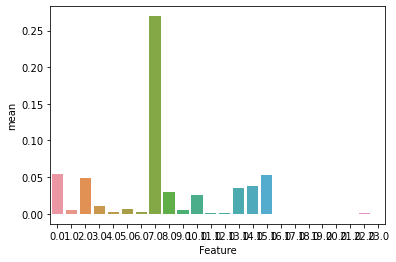

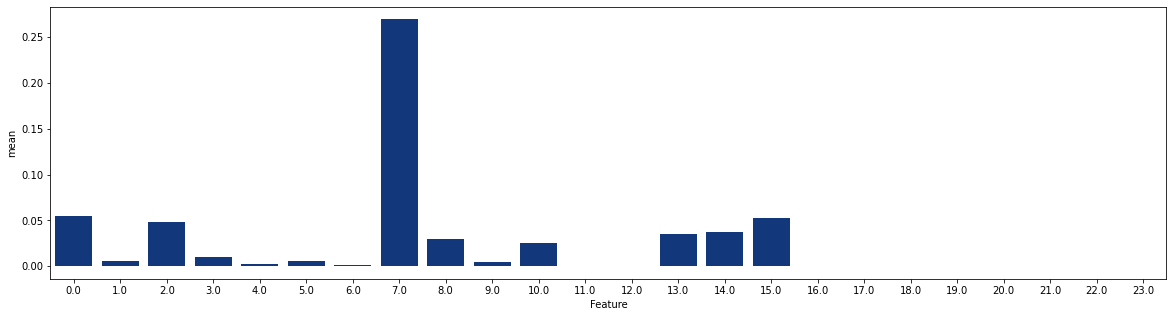

In [3]:
path='featureImportance_groupedKNN.pkl'
infile = open(path,'rb')
featureImportance_grouped = pickle.load(infile)
infile.close()

# featureImportance_grouped = featureImportance.groupby('Feature').agg({'Score':['mean']})
# print(featureImportance_grouped)
# featureImportance_grouped.to_pickle('featureImportance_groupedKNN.pkl')
ax = sns.barplot(x=featureImportance_grouped.index, y=featureImportance_grouped.Score['mean'], data=featureImportance_grouped)

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
ax = sns.barplot(x=featureImportance_grouped.index, y=featureImportance_grouped.Score['mean'], data=featureImportance_grouped, color='#00338d')

In [24]:
t = probs[:,:1].tolist()

data_df = pd.DataFrame(t)
data_df.to_pickle('KNN55.pkl')

In [25]:
# sns.set_theme()

# sns.lineplot(data=accuracyKNN, x="Sentence", y="Accuracy")
# plt.show()

# sns.lineplot(data=accuracyKNN, x="Sentence", y="Precision")
# plt.show()

# sns.lineplot(data=accuracyKNN, x="Sentence", y="Recall")
# plt.show()

# sns.lineplot(data=accuracyKNN, x="Sentence", y="F1")
# plt.show()

# sns.lineplot(data=accuracyKNN, x="Sentence", y="AUC")
# plt.show()